In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df = pd.read_csv("../input/car-price-prediction-challenge/car_price_prediction.csv")
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [10]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [12]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


### Exploratary Data Analysis
* Analyzing missing values
* Exploring Numerical variables
* Exploring Categorial variables
* Finding relationship between variables
* Finding outliers
* Data Cleaning

In [13]:
df.shape

(19237, 18)

In [14]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

<AxesSubplot:>

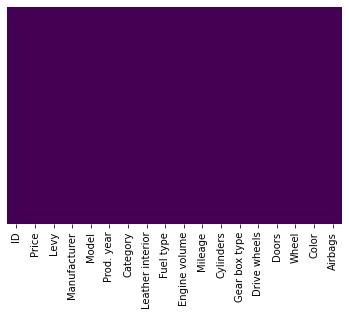

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Cylinders', ylabel='count'>

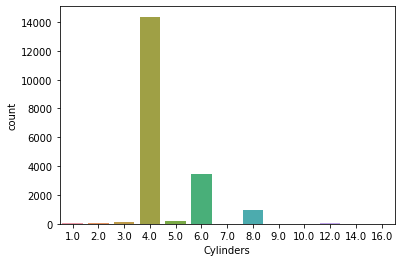

In [16]:
sns.countplot(data=df, x='Cylinders')

<AxesSubplot:xlabel='Cylinders', ylabel='Price'>

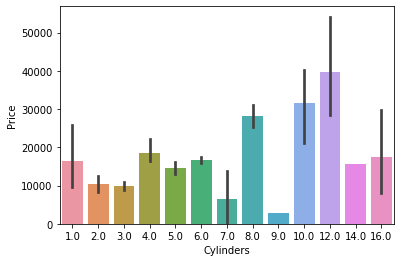

In [17]:
sns.barplot(data=df, x='Cylinders', y='Price')

<AxesSubplot:xlabel='Airbags', ylabel='count'>

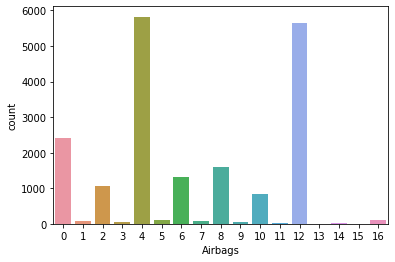

In [18]:
sns.countplot(data=df, x='Airbags')

<AxesSubplot:xlabel='Airbags', ylabel='Price'>

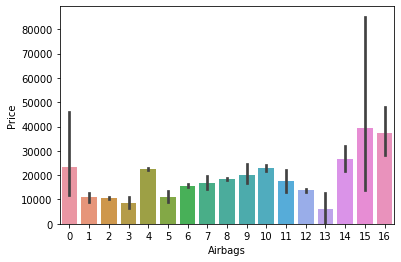

In [19]:
sns.barplot(data=df, x='Airbags', y='Price')

<AxesSubplot:xlabel='Prod. year', ylabel='Count'>

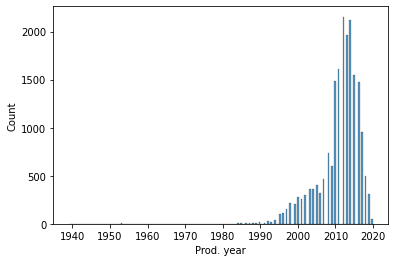

In [20]:
sns.histplot(data=df, x='Prod. year')

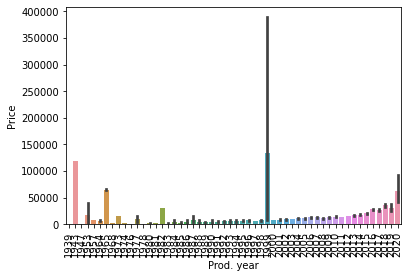

In [21]:
py=sns.barplot(data=df, x='Prod. year', y='Price')
py.set_xticklabels(py.get_xticklabels(), rotation=90)
plt.show()

In [22]:
df['Levy_missing']=np.where(df['Levy']=='-',1,0)

In [23]:
df['Levy']=df['Levy'].replace('-', '0')

In [24]:
df['Levy']=df['Levy'].astype(int)

<AxesSubplot:xlabel='Levy', ylabel='Count'>

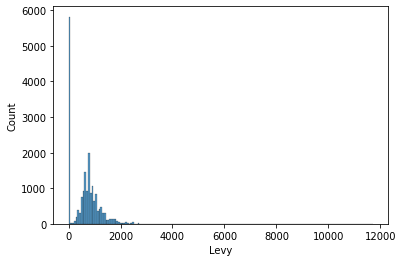

In [25]:
sns.histplot(data=df, x='Levy')

In [26]:
Levy_median = df.Levy.median()

In [27]:
df['Levy'] = df['Levy'].replace(0, Levy_median)

<AxesSubplot:xlabel='Levy', ylabel='Count'>

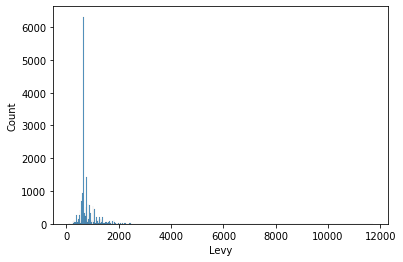

In [28]:
sns.histplot(data=df, x='Levy')

In [29]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Levy_missing
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,0
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,0
2,45774419,8467,642,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,1
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,0


In [30]:
df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [31]:
df['Engine volume']=df['Engine volume'].str.replace(' Turbo','')
df['Engine volume']=df['Engine volume'].astype(float)

<AxesSubplot:xlabel='Engine volume', ylabel='Count'>

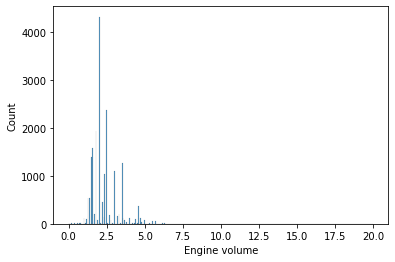

In [32]:
sns.histplot(data=df, x='Engine volume')

In [33]:
df['Mileage']=df['Mileage'].str.replace(' km', '').astype(int)

In [34]:
df['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [35]:
df['Doors']=df['Doors'].str.replace('04-May','4-5').replace('02-Mar','2-3')

In [36]:
df['Doors'].unique()

array(['4-5', '2-3', '>5'], dtype=object)

<AxesSubplot:xlabel='Doors', ylabel='count'>

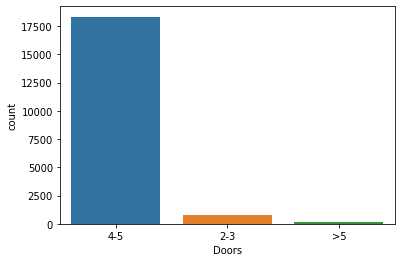

In [37]:
sns.countplot(data=df, x='Doors')

<AxesSubplot:xlabel='Doors', ylabel='Price'>

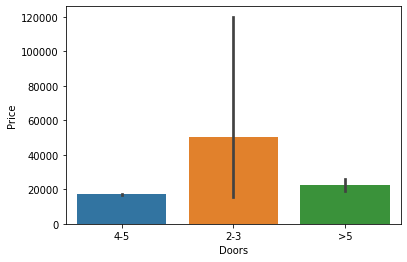

In [38]:
sns.barplot(data=df, x='Doors', y='Price')

In [39]:
df.Category.unique()

array(['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon',
       'Universal', 'Coupe', 'Minivan', 'Cabriolet', 'Limousine',
       'Pickup'], dtype=object)

<AxesSubplot:xlabel='Category', ylabel='count'>

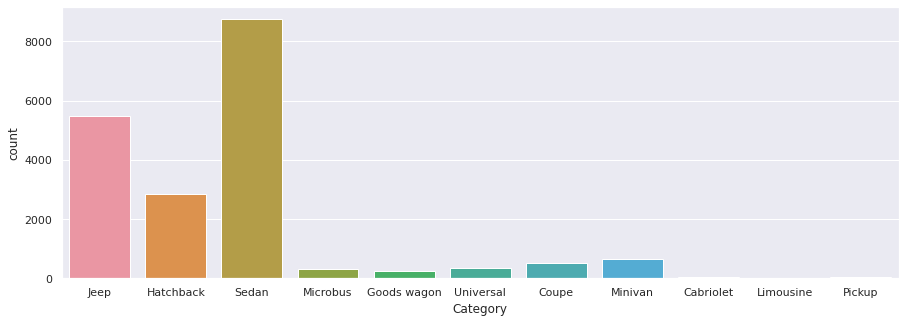

In [40]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(data=df, x='Category')

<AxesSubplot:xlabel='Category', ylabel='Price'>

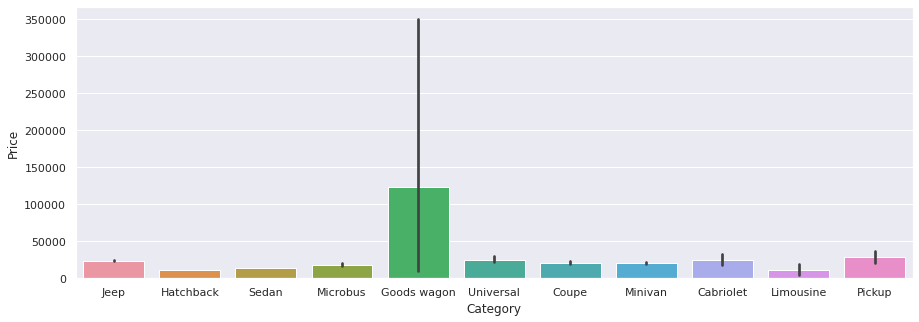

In [41]:
sns.barplot(data=df, x='Category', y='Price')

In [42]:
df.Model.unique()

array(['RX 450', 'Equinox', 'FIT', ..., 'E 230 124', 'RX 450 F SPORT',
       'Prius C aqua'], dtype=object)

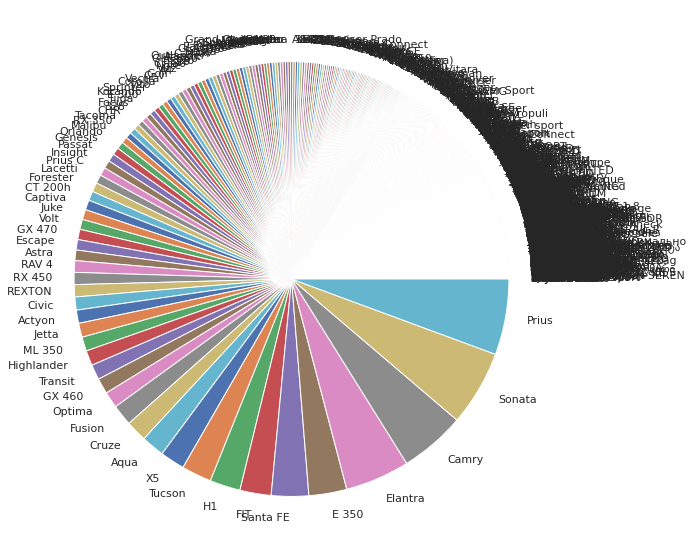

In [43]:
plt.figure(figsize=(10,10))
keys = list(df.groupby(['Model'])['Model'].count().sort_values().index)
values = list(df.groupby(['Model'])['Model'].count().sort_values().values)
plt.pie(values, labels = keys)
plt.show()

In [44]:
df.Manufacturer.unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

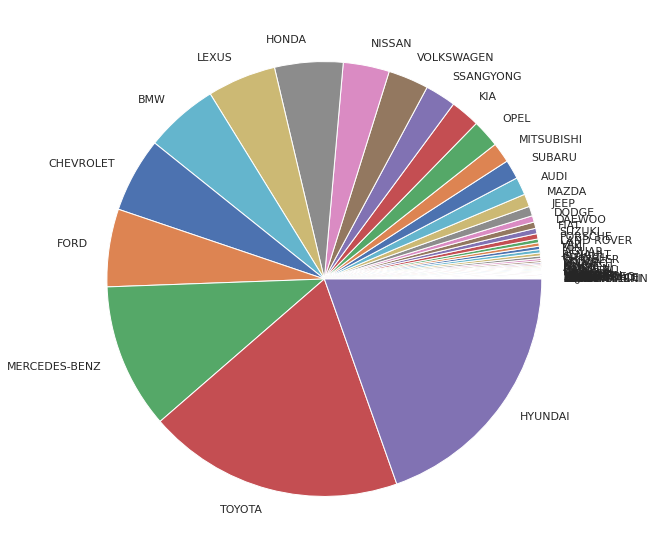

In [45]:
plt.figure(figsize=(10,10))
keys = list(df.groupby(['Manufacturer'])['Manufacturer'].count().sort_values().index)
values = list(df.groupby(['Manufacturer'])['Manufacturer'].count().sort_values().values)
plt.pie(values, labels = keys)
plt.show()

In [46]:
df['Leather interior'].unique()

array(['Yes', 'No'], dtype=object)

<AxesSubplot:xlabel='Leather interior', ylabel='count'>

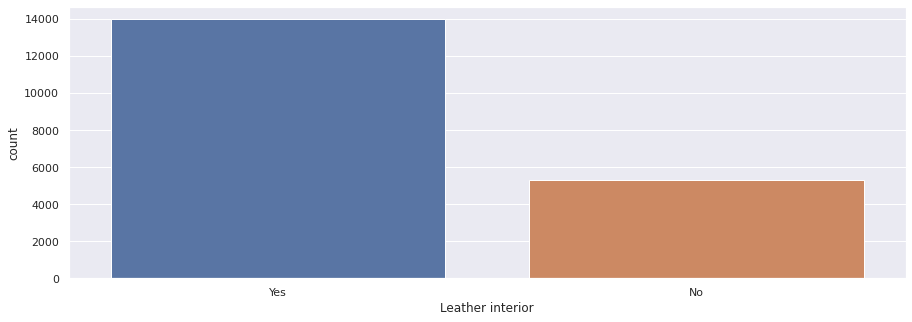

In [47]:
sns.countplot(data=df, x='Leather interior')

In [48]:
df.groupby(['Fuel type'])['Fuel type'].count()

Fuel type
CNG                 494
Diesel             4036
Hybrid             3578
Hydrogen              1
LPG                 892
Petrol            10150
Plug-in Hybrid       86
Name: Fuel type, dtype: int64

In [49]:
df['Fuel type']=df['Fuel type'].replace('Hydrogen','LPG')

<AxesSubplot:xlabel='Fuel type', ylabel='count'>

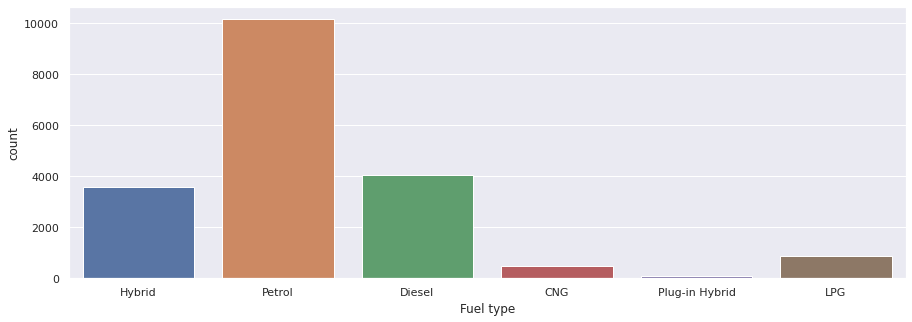

In [50]:
sns.countplot(data=df, x='Fuel type')

<AxesSubplot:xlabel='Fuel type', ylabel='Price'>

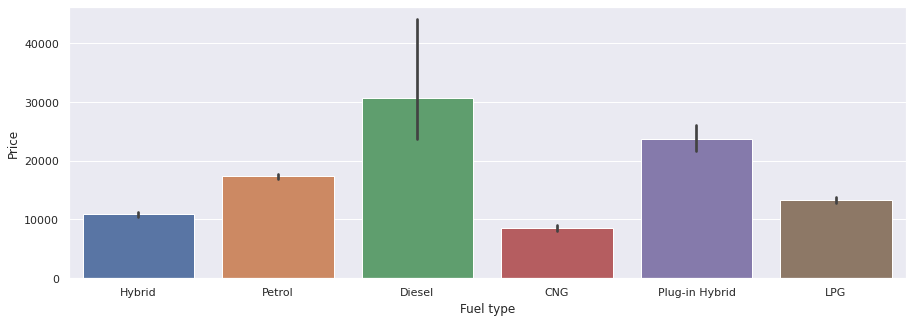

In [51]:
sns.barplot(data=df, x='Fuel type', y='Price')

In [52]:
df['Gear box type'].unique()

array(['Automatic', 'Tiptronic', 'Variator', 'Manual'], dtype=object)

<AxesSubplot:xlabel='Gear box type', ylabel='count'>

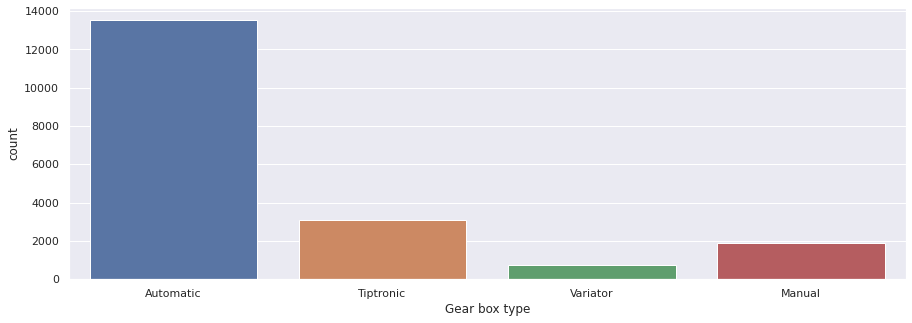

In [53]:
sns.countplot(data=df, x='Gear box type')

<AxesSubplot:xlabel='Gear box type', ylabel='Price'>

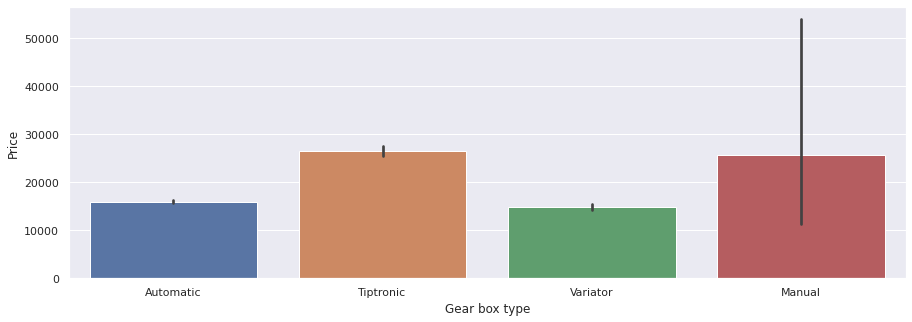

In [54]:
sns.barplot(data=df, x='Gear box type', y='Price')

In [55]:
df['Drive wheels'].unique()

array(['4x4', 'Front', 'Rear'], dtype=object)

<AxesSubplot:xlabel='Drive wheels', ylabel='count'>

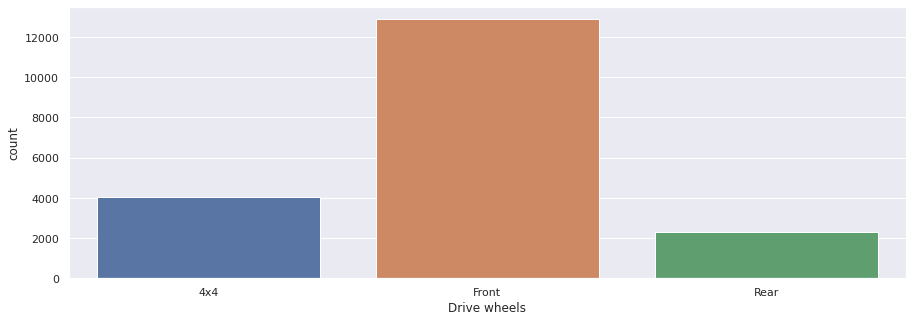

In [56]:
sns.countplot(data=df, x='Drive wheels')

<AxesSubplot:xlabel='Drive wheels', ylabel='Price'>

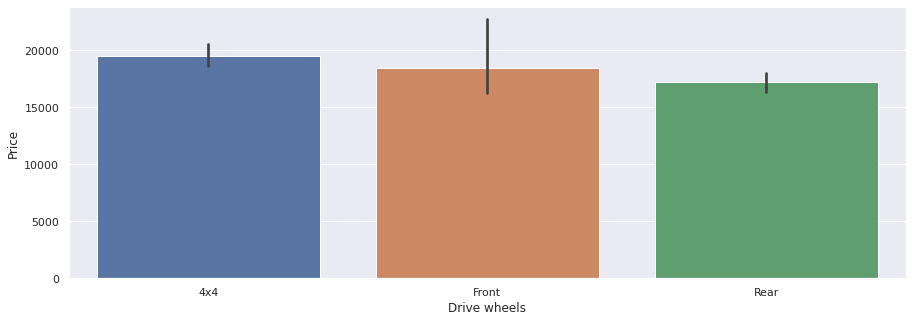

In [57]:
sns.barplot(data=df, x='Drive wheels', y='Price')

In [58]:
df['Wheel'].unique()

array(['Left wheel', 'Right-hand drive'], dtype=object)

<AxesSubplot:xlabel='Wheel', ylabel='count'>

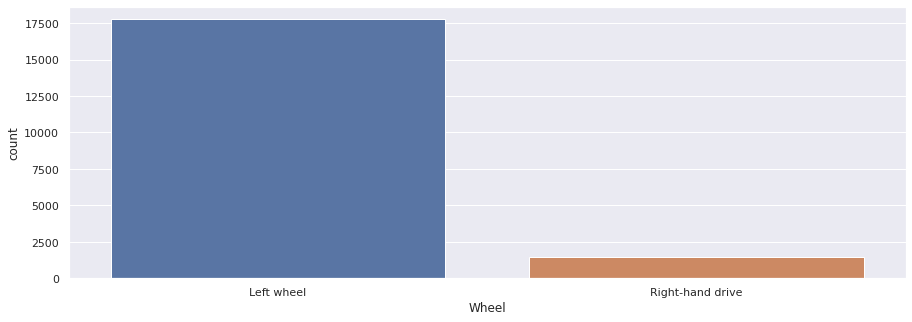

In [59]:
sns.countplot(data=df, x='Wheel')

<AxesSubplot:xlabel='Wheel', ylabel='Price'>

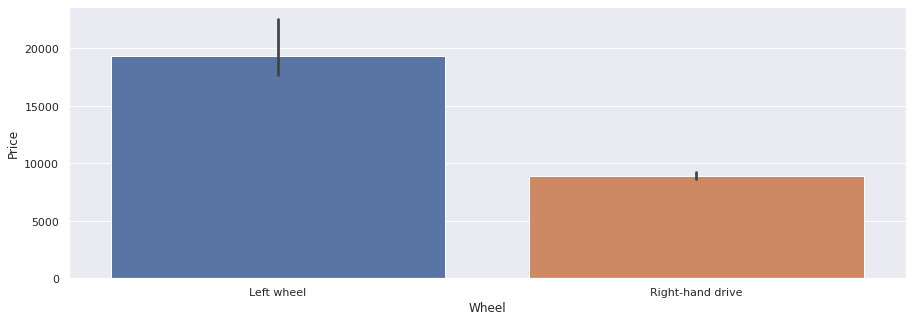

In [60]:
sns.barplot(data=df, x='Wheel', y='Price')

In [61]:
df['Color'].unique()

array(['Silver', 'Black', 'White', 'Grey', 'Blue', 'Green', 'Red',
       'Sky blue', 'Orange', 'Yellow', 'Brown', 'Golden', 'Beige',
       'Carnelian red', 'Purple', 'Pink'], dtype=object)

<AxesSubplot:xlabel='Color', ylabel='count'>

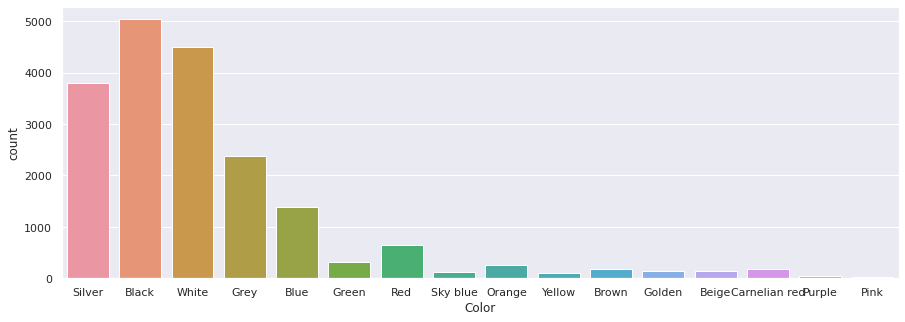

In [62]:
sns.countplot(data=df, x='Color')

<AxesSubplot:xlabel='Color', ylabel='Price'>

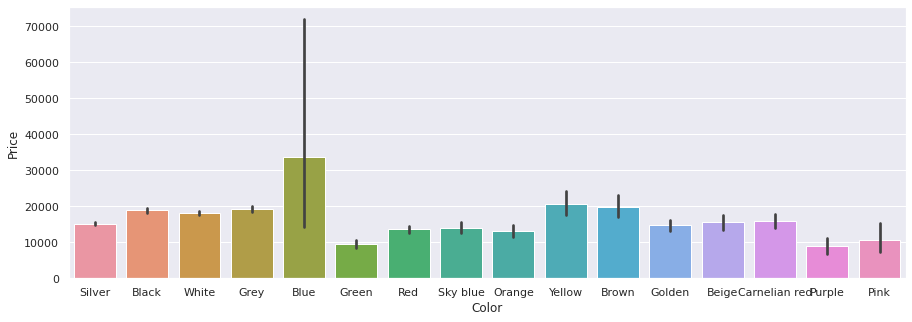

In [63]:
sns.barplot(data=df, x='Color', y='Price')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  int64  
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  float64
 10  Mileage           19237 non-null  int64  
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

<AxesSubplot:>

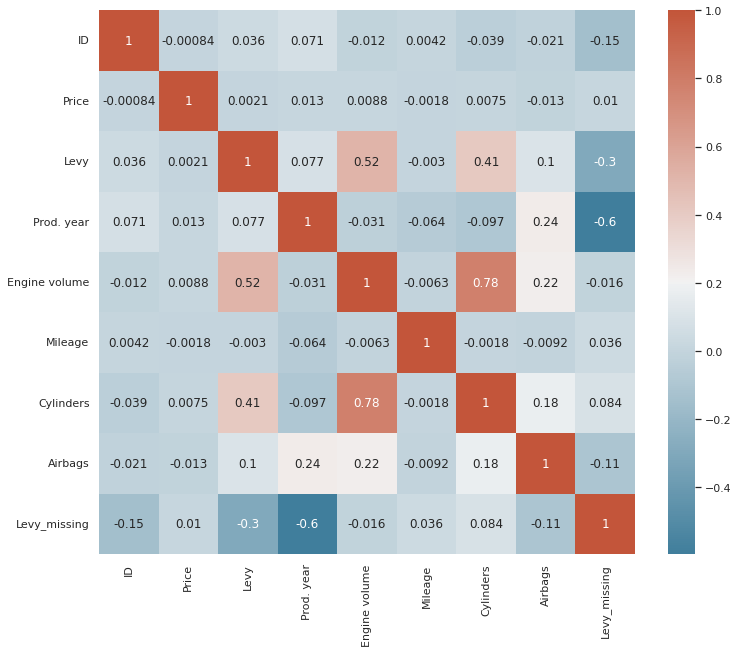

In [65]:
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap)

In [66]:
num_df = df[['Price','Levy','Prod. year','Mileage','Cylinders','Airbags']]

In [67]:
cat_df=df[['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']]

In [68]:
for feature in cat_df.columns:
    cats_list=cat_df[feature].value_counts().sort_values(ascending=False).head(10).index
    cats_list=list(cats_list)
    for categories in cats_list:
        cat_df[categories]=np.where(cat_df[feature]==categories,1,0)
    cat_df.drop(columns=[feature], inplace=True)
cat_df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,HYUNDAI,TOYOTA,MERCEDES-BENZ,FORD,CHEVROLET,BMW,LEXUS,HONDA,NISSAN,VOLKSWAGEN,...,Black,White,Silver,Grey,Blue,Red,Green,Orange,Brown,Carnelian red
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [69]:
final_df = pd.concat([num_df, cat_df], axis=1)
final_df.head()

,Price,Levy,Prod. year,Mileage,Cylinders,Airbags,HYUNDAI,TOYOTA,MERCEDES-BENZ,FORD,...,Black,White,Silver,Grey,Blue,Red,Green,Orange,Brown,Carnelian red
0,13328,1399,2010,186005,6.0,12,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,16621,1018,2011,192000,6.0,8,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,8467,642,2006,200000,4.0,2,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,3607,862,2011,168966,4.0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,11726,446,2014,91901,4.0,4,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [70]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
final_df=pd.DataFrame(scaler.fit_transform(final_df),columns=final_df.columns)
final_df.head()

,Price,Levy,Prod. year,Mileage,Cylinders,Airbags,HYUNDAI,TOYOTA,MERCEDES-BENZ,FORD,...,Black,White,Silver,Grey,Blue,Red,Green,Orange,Brown,Carnelian red
0,0.009317,2.752727,-0.333333,0.505310,2.0,0.75,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.205984,1.367273,-0.166667,0.555794,2.0,0.25,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.280996,0.000000,-1.000000,0.623163,0.0,-0.50,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.571249,0.800000,-0.166667,0.361822,0.0,-0.75,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.086359,-0.712727,0.333333,-0.287152,0.0,-0.25,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
features = list(final_df.columns)
features.remove('Price')
target = ['Price']
features = final_df[features]
label = final_df[target]
train_features, test_features, train_labels, test_labels = train_test_split(features, label, test_size=0.25, random_state=1)

In [72]:
from sklearn import metrics
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    predictions=predictions.reshape(len(test_features),1)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(float(np.mean(errors))))
    print(f'MAE: {metrics.mean_absolute_error(test_labels, predictions)}')
    print(f'RMSE: {metrics.mean_squared_error(test_labels, predictions,squared=False)}')
    print(f'R^2: {metrics.r2_score(test_labels, predictions)}')
    print(f'MSE: {metrics.mean_squared_error(test_labels, predictions)}')
    return metrics.r2_score(test_labels, predictions)

In [73]:
base_model = RandomForestRegressor()
base_model.fit(train_features, train_labels)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor()

In [74]:
base_r2_train = evaluate(base_model, train_features, train_labels)

Model Performance
Average Error: 0.2342 degrees.
MAE: 0.23423259544762376
RMSE: 6.169855523130012
R^2: 0.7788207285218702
MSE: 38.06711717629792


In [75]:
base_r2_test = evaluate(base_model, test_features, test_labels)

Model Performance
Average Error: 0.3200 degrees.
MAE: 0.3199764472096964
RMSE: 3.0841080917297825
R^2: -4.095546226742934
MSE: 9.51172272147312


In [76]:
base_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [79]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'max_depth': [10, 50, 100, None],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [1, 2, 3, 4, 5],
    'n_estimators': [10, 50, 100, 200]
}

rf = RandomForestRegressor()

random_search = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, cv = 5, n_jobs = -1, verbose = 2)

In [80]:
random_search.fit(train_features, train_labels)
best_grid = random_search.best_estimator_
random_r2 = evaluate(best_grid, test_features, test_labels)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/para

Model Performance
Average Error: 0.2987 degrees.
MAE: 0.29871556281198647
RMSE: 0.918674643179143
R^2: 0.5478786424134942
MSE: 0.8439631000203258
